In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
databaseWaveform = pd.read_csv("data/Waveform/Waveform.csv", encoding="utf-8")
databaseWaveform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      5000 non-null   float64
 1   x2      5000 non-null   float64
 2   x3      5000 non-null   float64
 3   x4      5000 non-null   float64
 4   x5      5000 non-null   float64
 5   x6      5000 non-null   float64
 6   x7      5000 non-null   float64
 7   x8      5000 non-null   float64
 8   x9      5000 non-null   float64
 9   x10     5000 non-null   float64
 10  x11     5000 non-null   float64
 11  x12     5000 non-null   float64
 12  x13     5000 non-null   float64
 13  x14     5000 non-null   float64
 14  x15     5000 non-null   float64
 15  x16     5000 non-null   float64
 16  x17     5000 non-null   float64
 17  x18     5000 non-null   float64
 18  x19     5000 non-null   float64
 19  x20     5000 non-null   float64
 20  x21     5000 non-null   float64
 21  x22     5000 non-null   float64
 22  

In [3]:
X = databaseWaveform.iloc[:, 1:-1]
correlationPearsonComplete = X.corr(method='pearson')
print(correlationPearsonComplete)

           x2        x3        x4        x5        x6        x7        x8  \
x2   1.000000  0.178194  0.210829  0.241583  0.230815  0.250903  0.203992   
x3   0.178194  1.000000  0.377506  0.446939  0.448300  0.452159  0.369136   
x4   0.210829  0.377506  1.000000  0.568383  0.575066  0.575361  0.477697   
x5   0.241583  0.446939  0.568383  1.000000  0.665207  0.659990  0.551332   
x6   0.230815  0.448300  0.575066  0.665207  1.000000  0.713170  0.623945   
x7   0.250903  0.452159  0.575361  0.659990  0.713170  1.000000  0.694392   
x8   0.203992  0.369136  0.477697  0.551332  0.623945  0.694392  1.000000   
x9   0.124969  0.216917  0.285618  0.319386  0.427614  0.527188  0.600209   
x10  0.002186 -0.009293 -0.007247 -0.013165  0.107114  0.198620  0.351917   
x11 -0.145557 -0.233267 -0.295794 -0.329440 -0.228477 -0.144249  0.040742   
x12 -0.216484 -0.366695 -0.474402 -0.532892 -0.487199 -0.436861 -0.277193   
x13 -0.249542 -0.429894 -0.557521 -0.639935 -0.659874 -0.660448 -0.545596   

In [4]:
df1 = pd.DataFrame(correlationPearsonComplete)
df1.to_csv("data/Waveform/CorrelacaoPearsonComplete.csv", index=False)

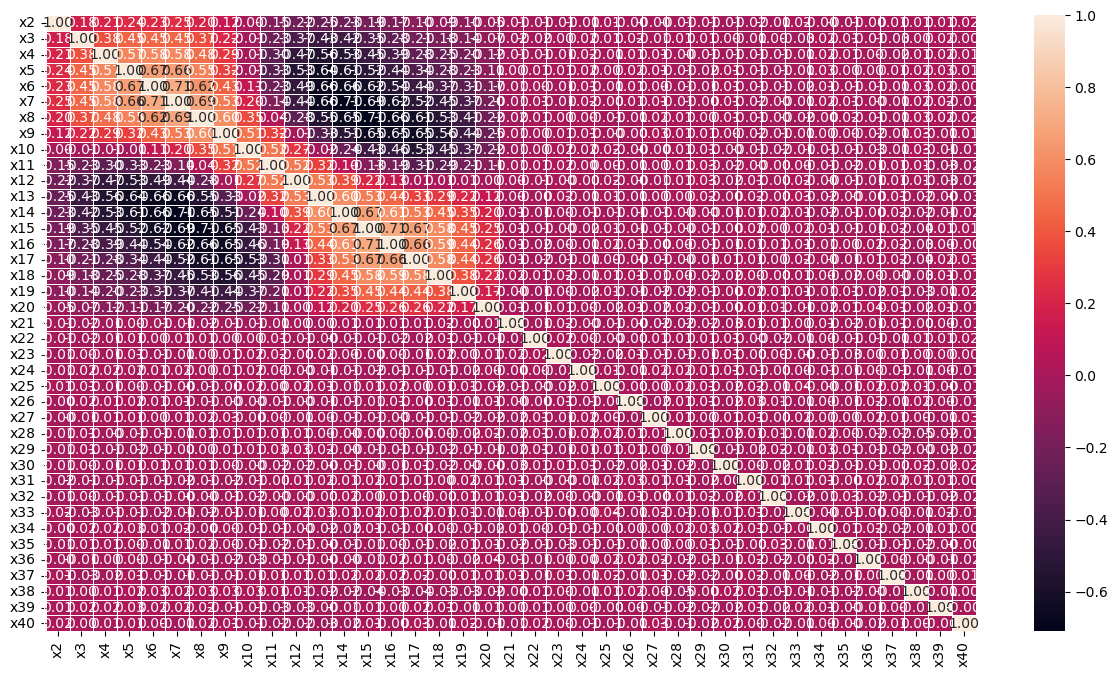

In [5]:
plt.figure(figsize=(15, 8))
plot = sn.heatmap(correlationPearsonComplete, annot=True, fmt=".2f", linewidths=.6)
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
X_std = StandardScaler().fit_transform(X)
print(X_std)
print(X_std.shape)

[[-1.47903857  0.46648857  0.15948737 ...  0.57335191 -0.51976075
   0.26335531]
 [ 0.64877525  0.36469     0.33537755 ... -0.07950605 -1.31153883
   0.97142837]
 [ 0.34067551 -0.32245038  0.27205708 ...  1.36682542 -1.60845562
   0.07387097]
 ...
 [-1.53680727  0.23744178 -0.70589232 ...  1.02533049 -1.62825007
   0.16362671]
 [ 0.53323784  0.35620678 -0.27672028 ... -0.79262781 -0.32181622
  -0.16547767]
 [-1.33461682  2.09526576 -1.49388034 ... -1.00355115  0.73718697
   1.47007137]]
(5000, 39)


In [8]:
from sklearn.decomposition import PCA

In [9]:
pca90 = PCA(n_components=0.90, whiten=True)
X_std_pca90 = pca90.fit_transform(X_std)

print(X_std_pca90)
print(X_std_pca90.shape)

[[-1.17763852 -1.05815676 -0.41881897 ... -1.31021064  0.36363792
   1.0908922 ]
 [ 1.19898867 -0.20768242  0.25984955 ...  0.32086764  1.16534639
  -0.26822187]
 [-1.41218667 -0.71808385  0.32708223 ...  0.19922258 -2.29698518
   0.36584941]
 ...
 [-1.05465993  0.23767161  0.42252002 ...  0.67705056 -0.57913544
  -0.10451338]
 [-1.02142427 -0.64805287  0.01211569 ...  0.9126114  -1.130657
   0.17013507]
 [-1.0651607   0.13074059  0.58361093 ... -3.30012544 -0.16162862
  -0.63389831]]
(5000, 28)


In [10]:
df1 = pd.DataFrame(X_std_pca90)
df1.to_csv("data/Waveform/PCA90.csv", index=False)

In [11]:
pca10 = PCA(n_components=10, whiten=True)
X_std_pca10 = pca10.fit_transform(X_std)

print(X_std_pca10)
print(X_std_pca10.shape)

[[-1.17763852 -1.05815676 -0.41881897 ...  0.1594791   0.18682056
   0.45220876]
 [ 1.19898867 -0.20768242  0.25984955 ... -0.90943788 -0.6169566
   0.50755876]
 [-1.41218667 -0.71808385  0.32708223 ...  1.36887344 -2.21845848
  -0.8886031 ]
 ...
 [-1.05465993  0.23767161  0.42252002 ...  0.81521522  1.70196581
   1.09201005]
 [-1.02142427 -0.64805287  0.01211569 ... -0.34323711  0.61799187
   0.22564588]
 [-1.0651607   0.13074059  0.58361093 ... -1.43429267 -0.32406568
   1.04223597]]
(5000, 10)


In [12]:
df1 = pd.DataFrame(X_std_pca10)
df1.to_csv("data/Waveform/PCA10.csv", index=False)